# Intro To Keras!!

# Creating The Keras Model

# Setting the Ground(Model Architecture)

In [1]:
##Necessary Imports 
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

In [2]:
##Load the dataset
can = load_breast_cancer()
df = pd.DataFrame(can.data)
y = can.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
##Lets describe the data
df.describe().T

##From description it is obvious that we should normalize our dataset as normalization would affect the accuracy
##of the model. We'll why

,count,mean,std,min,25%,50%,75%,max
0,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
1,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
2,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
3,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
4,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
5,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
6,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
7,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
8,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
9,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [ ]:
##Standardizatioin 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = df.iloc[:,:].values
X = sc.fit_transform(X)
X

##Thus our data is standardised

# Why Normalization

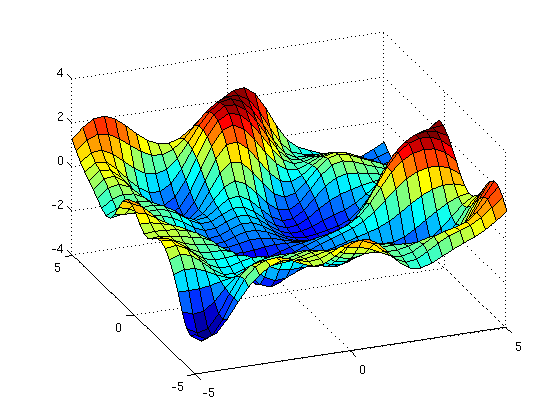

In [4]:
from IPython.display import Image
Image(filename='non_gausian.png')

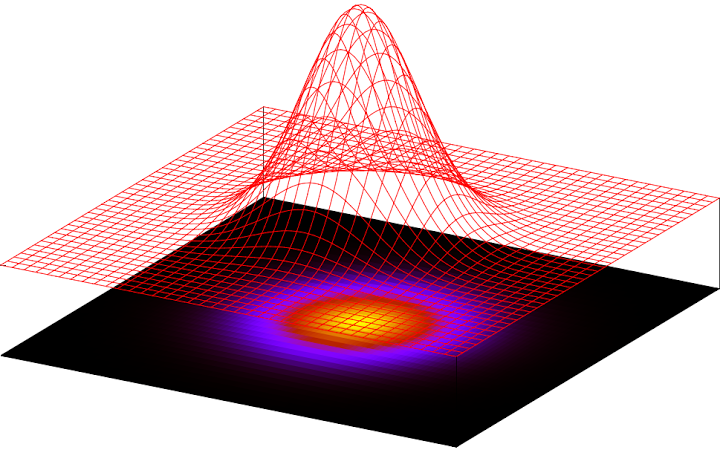

In [5]:
Image(filename='bell_3d.png')

In [ ]:
##Let's set up the architecture of the NN:---
'''
    A neural network consists of hidden layers having some number of units called as neurons and these neurons
    functions as the computational site as all the computations occurs hare.
    we will play around the neurons only.(Most of the time)
'''

##Importing the keras library
from keras.layers import Dense
from keras.models import Sequential

'''
    DENSE:--all the nodes in the previous layers are connected with all nodes in the connected layer.
        (Just like purely connected graph)(see image-1)

    SEQUENTIAL:---Sequential model requires that each layers has weights or connections only to the one layer
    comming directly after it in the network diagram.
    
    LAYERS:--- Keras layers are the fundamental building block of keras models. 
    
    MODELS:---It is the core datastructure of the Keras
'''

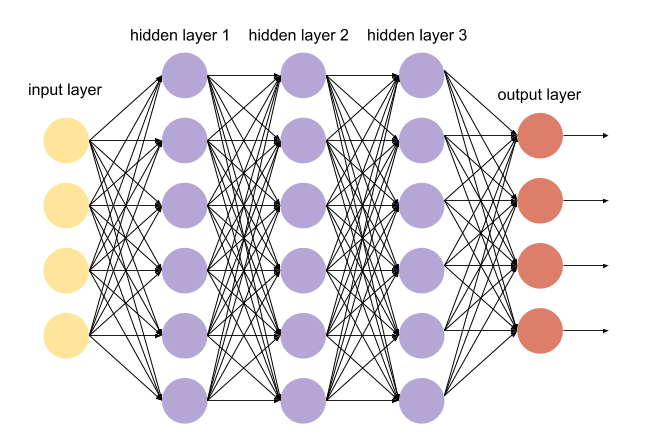

In [6]:
Image(filename = "dense.png")
##Representation of dense

In [ ]:
##Deciding the input shape of the data
print("shape of the df",df.shape)
print(len(np.unique(y)),'is the distinct outputs')
##as we have 30 features so will be having 30 input nodes .

In [ ]:
##Lets make the model

##Initializing the sequential class
model = Sequential()

## we stack the layers using ADD
model.add(Dense(60,activation = 'relu',input_shape = (30,)))  ##H1 and input shape
model.add(Dense(45,activation = 'relu'))                      ##H2 
model.add(Dense(30,activation = 'relu'))                      ##H3
model.add(Dense(15,activation = 'relu'))                      ##H4  
model.add(Dense(2,activation = 'sigmoid'))                                           ##Output layer

# Compiling the Model

In [ ]:
##Lets compile with compile
import keras
##Initialize the optimmizer
opt = keras.optimizers.SGD(lr = 0.01)
##SGD is short for Stochastic Gradient Descent where Batch size is 1
##Learning rate is used to descend towards the minimum by optimizing the weights and biases
##new_weight = old_weight-learning_rate*gradient

##compilation with compile
model.compile(loss = 'categorical_crossentropy',optimizer = opt,metrics = ['accuracy'])

In [ ]:
##As our input is binary so lets use to_categorical for the binary classification

from keras.utils import to_categorical
y = to_categorical(y)

# Fitting the model to the dataset

In [ ]:

##fitting the model with .fit
model.fit(X,y,epochs = 450)
##epochs is no of loops we are going to run for the model optiimization

# Prediction

In [ ]:
##Lets predict using predict
pred = model.predict(X)
##The prediction is a probability so we are going to take one axis and round it to see the accuracy
pred = pred[:,[1]].round()

In [ ]:
##Lets take the original targets
y_true = y[:,[1]]

In [ ]:
##Lets use confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,pred)
cm
##Thus we have 19 false predictions 
##Taking about the accuracy its not good because that part is false negative and more dangerous.
##That means 19 people were told that they dont had cancer but actually they had it.(so dangerous)
##Now our target is to reduce false negative

# Fine Tuning The Keras Model

# Let's BreakUp From Some neurons(DropOut)

In [ ]:
##Importing dropout
from keras.layers import Dropout

##Initializing the sequential class
new_model = Sequential()

## we stack the layers using ADD
new_model.add(Dense(60,activation = 'relu',input_shape = (30,)))  ##H1 and input shape
##As we have more units se larger dropout
new_model.add(Dropout(0.7))

new_model.add(Dense(45,activation = 'relu'))                      ##H2 
new_model.add(Dropout(0.6))

new_model.add(Dense(30,activation = 'relu'))                      ##H3
new_model.add(Dropout(0.5))

##Dont want dropout hare
new_model.add(Dense(15,activation = 'relu'))                      ##H4  

new_model.add(Dense(2,activation = 'sigmoid')) 
##we must not have dropout for output layers

# Optimize the Optimizers

In [ ]:
##Adam optimizer
import keras
new_opt = keras.optimizers.Adam(lr = 0.007)
##rest all the parameters alpha and beta should be left default because they pretuned

In [ ]:
##Compile the model
new_model.compile(loss = 'categorical_crossentropy',optimizer = new_opt,metrics = ['accuracy'])

# Lets apply the Emergency Breaks:--

In [ ]:
##Fitting with the help of ealy stopping
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience = 2)
##patinece defines how many epochs our model can go without improving. i think 4 is great choice.
new_model.fit(X,y,validation_split = 0.2,epochs = 1000,callbacks = [early_stopping_monitor])
##validation split is used instead of k fold cross validation because k fold will take much of the training time
##validation split gives better result

# Prediction

In [ ]:
##Lets use newly trained model for prediction
y_pred = new_model.predict(X)
y_pred = y_pred[:,[1]].round()

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y[:,[1]],y_pred)
cm
##Thus we see accuracy had increased it is 5 in false negative and we encountered 6 in false positive 
##Overall 11 which is better then 19.

# More Tuning

In [ ]:
from keras.layers import Dropout
def gen_from_model():
    ##Lets creat new model
    model_2 = Sequential()

    ## we stack the layers using ADD
    model_2.add(Dense(60,activation = 'relu',input_shape = (30,)))  ##H1 and input shape
    ##As we have more units se larger dropout
    model_2.add(Dropout(0.7))

    model_2.add(Dense(45,activation = 'relu'))                      ##H2 
    model_2.add(Dropout(0.6))

    model_2.add(Dense(30,activation = 'relu'))                      ##H3
    model_2.add(Dropout(0.5))

    ##Dont want dropout hare
    model_2.add(Dense(15,activation = 'relu'))                      ##H4  

    model_2.add(Dense(2,activation = 'sigmoid')) 
    ##we must not have dropout for output layers
    return model_2

In [ ]:
##Lets use train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.28)

In [ ]:
import keras


##Learn the learning rate
learning_rate = [0.001,0.005,0.007,0.01]
score = []
for lr in learning_rate:
    model_2 = gen_from_model()
    opt = keras.optimizers.Adam(lr = lr)
    ##compiling the model
    model_2.compile(loss = 'categorical_crossentropy',optimizer = opt,metrics = ['accuracy'])
    ##fitting the model
    model_2.fit(X_train,y_train,epochs = 250)
    ##Evaluating the score
    scr = model_2.evaluate(X_test,y_test)
    ##appending the result to score
    score.append(scr)
    
print(score)

In [ ]:
##Thus we see that learning_rate of 0.007 is best with low loss and high accuracy
##One of the few things we can try batch greadient descent
##Lets run a batch optimization with adam
my_model = gen_from_model()
opt = keras.optimizers.Adam(lr = 0.007)
my_model.compile(loss = 'categorical_crossentropy',optimizer = opt,metrics = ['accuracy'])
my_model.fit(X_train,y_train,epochs = 100,batch_size = 128)

In [ ]:
##Lets predict the results
y_prd = my_model.predict(X_test)
y_prd = y_prd[:,[1]].round()

In [ ]:
##Using confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test[:,[1]],y_prd)
cm
##This is improved result.

# Run According To The Path

In [ ]:
##Lets use reduce on Pleatue call back
from keras.callbacks import ReduceLROnPlateau
call_model = gen_from_model()
opt = keras.optimizers.Adam(lr = 0.007)
call_model.compile(loss = 'categorical_crossentropy',optimizer = opt,metrics = ['accuracy'])
pleatu_reduce = ReduceLROnPlateau(monitor = 'val_loss',factor = 0.2,patience = 5,min_lr = 0.0001)
call_model.fit(X_train,y_train,epochs = 200,callbacks = [pleatu_reduce])

In [ ]:
##Lets predict the results
y_pd = call_model.predict(X_test)
y_pd = y_pd[:,[1]].round()

In [ ]:
##Using confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test[:,[1]],y_pd)
cm

##This is more improved result 

# Challenges

# Things we can Try